# High-level introduction to <code>pandas</code>
For a more complete introduction to <code>pandas</code>, see [https://pandas.pydata.org/](https://pandas.pydata.org/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series
Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [2]:
data = np.random.randn(20)
index = range(1990, 2010)

In [3]:
y = pd.Series(data, index=index)

In [4]:
salaries = {
    'gino': 1500, 'maria': 2560.34, 'luca': None, 'federico': 2451
}

In [5]:
s = pd.Series(salaries)

### Access series as arrays

In [6]:
print (s[:2], '\n')
print (s[s > s.median()], '\n')
print (np.log(s), '\n')
print (s + s, '\n')
print (s * 3, '\n')
print (y[4:8] + y[4:10])

federico    2451.0
gino        1500.0
dtype: float64 

maria    2560.34
dtype: float64 

federico    7.804251
gino        7.313220
luca             NaN
maria       7.847895
dtype: float64 

federico    4902.00
gino        3000.00
luca            NaN
maria       5120.68
dtype: float64 

federico    7353.00
gino        4500.00
luca            NaN
maria       7681.02
dtype: float64 

1994    2.296191
1995    1.043052
1996   -2.678703
1997    0.064401
1998         NaN
1999         NaN
dtype: float64


### Access series as dictionaries

In [7]:
print (s['gino'])
try:
    print (s['carlo'])
except KeyError:
    print ('get errors as in dict')
print (s.get('carlo'))

1500.0
get errors as in dict
None


# Data Frames
From [http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

In [8]:
k = {'years': y, 'salaries': s}
df = pd.DataFrame(k)

In [9]:
print (df)

          salaries     years
federico   2451.00       NaN
gino       1500.00       NaN
luca           NaN       NaN
maria      2560.34       NaN
1990           NaN  0.443948
1991           NaN  0.178327
1992           NaN  0.622898
1993           NaN -1.227329
1994           NaN  1.148095
1995           NaN  0.521526
1996           NaN -1.339352
1997           NaN  0.032200
1998           NaN  0.841902
1999           NaN  0.026888
2000           NaN -0.979441
2001           NaN  0.601941
2002           NaN -0.826490
2003           NaN -1.163523
2004           NaN -0.759732
2005           NaN  0.948705
2006           NaN  1.483676
2007           NaN  0.276332
2008           NaN  0.959349
2009           NaN  0.482356


In [31]:
data = {}
for k, v in s.items():
    data[k] = {}
    for d, w in y.items():
        data[k][d] = v + (v*w)

In [36]:
ydf = pd.DataFrame(data)

In [37]:
ydf.head()

,federico,gino,luca,maria
1990,3539.115595,2165.921417,NaN,3696.996827
1991,2888.078792,1767.490081,NaN,3016.917036
1992,3977.723397,2434.347244,NaN,4155.171083
1993,-557.183029,-340.993286,NaN,-582.039166
1994,5264.982013,3222.143215,NaN,5499.854772


In [40]:
pd.DataFrame.from_dict(data, orient='index').head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
federico,3539.115595,2888.078792,3977.723397,-557.183029,5264.982013,3729.259747,-831.750537,2529.923236,4514.502137,2516.901651,50.389237,3926.358235,425.271796,-400.794939,588.897304,4776.275157,6087.490681,3128.290795,4802.363392,3633.255234
gino,2165.921417,1767.490081,2434.347244,-340.993286,3222.143215,2282.288707,-509.027257,1548.300634,2762.853205,1540.331488,30.837966,2402.912016,260.264257,-245.284540,360.402267,2923.057012,3725.514493,1914.498650,2939.022884,2223.534415
luca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maria,3696.996827,3016.917036,4155.171083,-582.039166,5499.854772,3895.623379,-868.855231,2642.784030,4715.895717,2629.181548,52.637119,4101.514501,444.243325,-418.674547,615.168226,4989.346526,6359.055851,3267.844983,5016.598567,3795.336069


## Loading and manipulating data

In [106]:
football = '../data/fifa/fifa_2018.csv'
fifa = pd.read_csv(football)

In [107]:
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [108]:
selected_cols = [
    'ID', 'name', 'club', 'league', 'height_cm', 'weight_kg', 'nationality', 'eur_value', 'overall',
    'short_passing', 'long_passing', 'finishing', 'shot_power', 'marking', 'standing_tackle',
    'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'
]

In [109]:
F = fifa[selected_cols]

In [110]:
print (fifa.shape)
print (F.shape)

(17994, 185)
(17994, 21)


In [111]:
new_columns = {
    'atk': ['finishing', 'shot_power'],
    'dfs': ['marking', 'standing_tackle', 'sliding_tackle'],
    'psg': ['short_passing', 'long_passing'],
    'gkv': ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
}

In [112]:
S = F.copy()

for k, v in new_columns.items():
    S[k] = F[v].mean(axis=1) / 100
    S = S.drop(v, axis=1)

In [113]:
S.head()

,ID,name,club,league,height_cm,weight_kg,nationality,eur_value,overall,atk,dfs,psg,gkv
0,20801,Cristiano Ronaldo,Real Madrid CF,Spanish Primera División,185.0,80.0,Portugal,95500000.0,94,0.940,0.253333,0.800,0.116
1,158023,L. Messi,FC Barcelona,Spanish Primera División,170.0,72.0,Argentina,105000000.0,93,0.900,0.223333,0.875,0.108
2,190871,Neymar,Paris Saint-Germain,French Ligue 1,175.0,68.0,Brazil,123000000.0,92,0.845,0.260000,0.780,0.118
3,176580,L. Suárez,FC Barcelona,Spanish Primera División,182.0,86.0,Uruguay,97000000.0,92,0.905,0.376667,0.735,0.306
4,167495,M. Neuer,FC Bayern Munich,German Bundesliga,193.0,92.0,Germany,61000000.0,92,0.190,0.103333,0.570,0.912


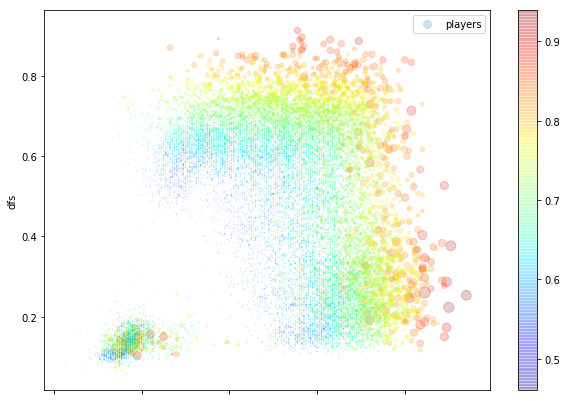

In [114]:
S.plot(kind='scatter', x='atk', y='dfs', figsize=(10,7),
        s=S['eur_value']/1000000.0, label='players', cmap=plt.get_cmap('jet'),
        alpha=0.2, c=S['overall']/100.0, colorbar=True)
plt.legend()
plt.show()

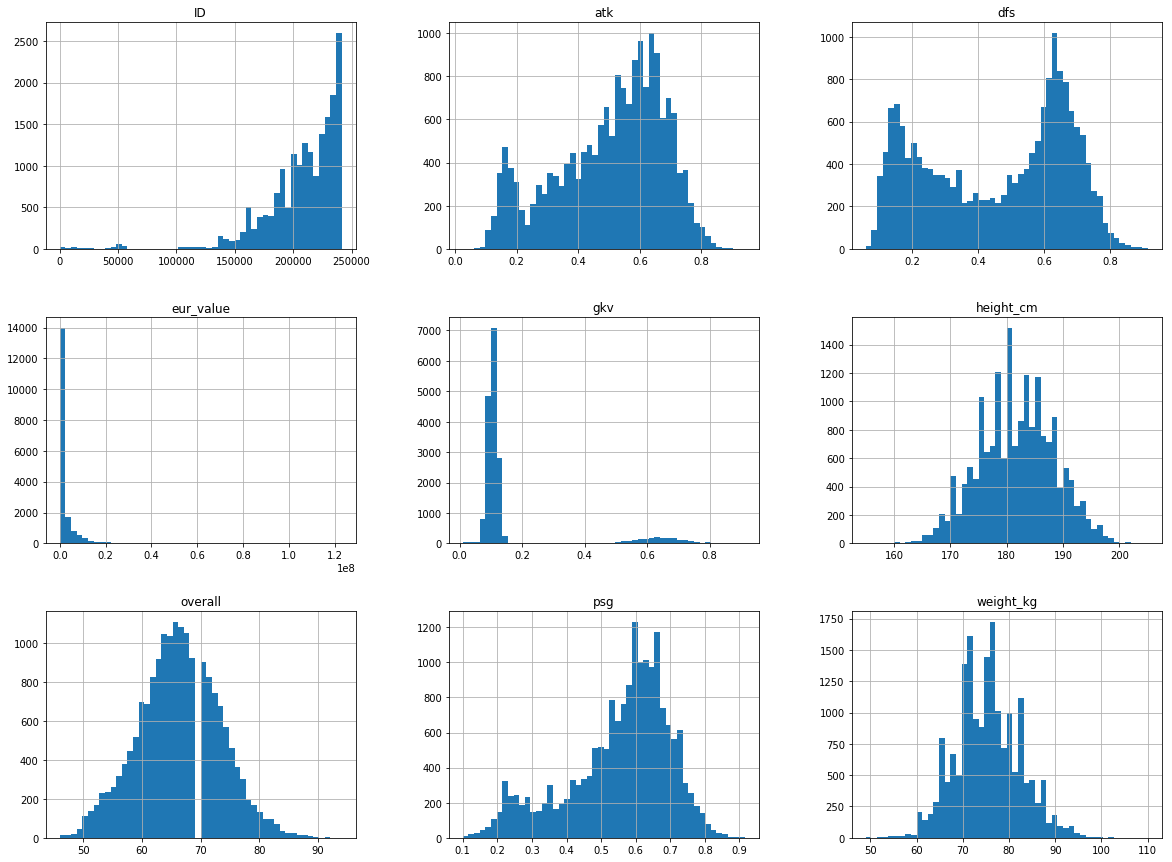

In [115]:
S.hist(bins=50, figsize=(20,15))
plt.show()

## Access dataframe by index and col

In [116]:
S.iloc[2:6] # gets rows (or columns) at particular positions in the index (so it only takes integers).

,ID,name,club,league,height_cm,weight_kg,nationality,eur_value,overall,atk,dfs,psg,gkv
2,190871,Neymar,Paris Saint-Germain,French Ligue 1,175.0,68.0,Brazil,123000000.0,92,0.845,0.260000,0.780,0.118
3,176580,L. Suárez,FC Barcelona,Spanish Primera División,182.0,86.0,Uruguay,97000000.0,92,0.905,0.376667,0.735,0.306
4,167495,M. Neuer,FC Bayern Munich,German Bundesliga,193.0,92.0,Germany,61000000.0,92,0.190,0.103333,0.570,0.912
5,188545,R. Lewandowski,FC Bayern Munich,German Bundesliga,185.0,79.0,Poland,92000000.0,91,0.895,0.286667,0.740,0.102


In [118]:
S.loc[2:6] # gets rows (or columns) with particular labels from the index

,ID,name,club,league,height_cm,weight_kg,nationality,eur_value,overall,atk,dfs,psg,gkv
2,190871,Neymar,Paris Saint-Germain,French Ligue 1,175.0,68.0,Brazil,123000000.0,92,0.845,0.260000,0.780,0.118
3,176580,L. Suárez,FC Barcelona,Spanish Primera División,182.0,86.0,Uruguay,97000000.0,92,0.905,0.376667,0.735,0.306
4,167495,M. Neuer,FC Bayern Munich,German Bundesliga,193.0,92.0,Germany,61000000.0,92,0.190,0.103333,0.570,0.912
5,188545,R. Lewandowski,FC Bayern Munich,German Bundesliga,185.0,79.0,Poland,92000000.0,91,0.895,0.286667,0.740,0.102
6,193080,De Gea,Manchester United,English Premier League,193.0,76.0,Spain,64500000.0,90,0.220,0.156667,0.505,0.876


In [119]:
S[S['club'] == 'Paris Saint-Germain'].sort_values('overall', ascending=False)[:5]

,ID,name,club,league,height_cm,weight_kg,nationality,eur_value,overall,atk,dfs,psg,gkv
2,190871,Neymar,Paris Saint-Germain,French Ligue 1,175.0,68.0,Brazil,123000000.0,92,0.845,0.260000,0.780,0.118
30,164240,Thiago Silva,Paris Saint-Germain,French Ligue 1,183.0,79.0,Brazil,34000000.0,88,0.560,0.890000,0.800,0.090
34,199556,M. Verratti,Paris Saint-Germain,French Ligue 1,165.0,60.0,Italy,64500000.0,87,0.570,0.796667,0.895,0.128
38,179813,E. Cavani,Paris Saint-Germain,French Ligue 1,184.0,71.0,Uruguay,48500000.0,87,0.840,0.320000,0.640,0.106
85,183898,A. Di María,Paris Saint-Germain,French Ligue 1,180.0,75.0,Argentina,37500000.0,85,0.785,0.506667,0.810,0.102


In [121]:
S[S['league']=='French Ligue 1'][['club', 'overall', 'atk', 'dfs']].groupby('club').median()

,overall,atk,dfs
club,,,
AS Monaco,76.0,0.5900,0.576667
AS Saint-Étienne,71.0,0.5150,0.625000
Amiens SC Football,70.0,0.5900,0.453333
Angers SCO,71.0,0.5850,0.633333
Dijon FCO,71.0,0.5550,0.626667
ES Troyes AC,67.0,0.5100,0.523333
En Avant de Guingamp,71.5,0.5400,0.596667
FC Metz,70.0,0.5075,0.578333
FC Nantes,71.0,0.5800,0.573333
